## The Data
This dataset is from [Kaggle: Diagnose Specific Language Impairment in Children](https://www.kaggle.com/dgokeeffe/specific-language-impairment/data). It is a collection of three separate datasets which all consist of narratives from a child (adolescent and younger) attempting to complete a wordless picture task. Based on the narratives, features have been given to describe the fluency of their response. The goal is to be able to automate the diagnosis of "Specific Language Impairment" given these features. Specific Language Impairment (SLI) is a condition that effects 7% of 5-year-old children and is characterized by a lack of language ability in comparison to peers but with no obvious mental or physical disability

The dataset contains 1163 instances and 63 features (59 numerical, 4 categorical). A decription of these features can be found [here](https://www.kaggle.com/dgokeeffe/specific-language-impairment).

Class Lables:
0 = No/Subject does not have SLI
1 = Yes/Subject has SLI

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.naive_bayes import BernoulliNB

In [4]:
from sklearn import tree
from graphviz import Source

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("~/Downloads/all_data_R.csv")

## Preprocessing and Binarizing Data

In [7]:
df = df.drop('group', axis=1)
df = df.drop('corpus', axis=1)
df = df.drop('filename', axis=1)
df = df.drop('age', axis=1)

In [8]:
gender_to_int = {"male":0, "female":1}
df["sex"] =df["sex"].replace(gender_to_int)

In [9]:
gender_mode = df['sex'].mode()
print("Mode of gender in data is", gender_mode)
df['sex'] = df['sex'].fillna(0.0)

Mode of gender in data is 0    0.0
dtype: float64


### Test-Train Split

In [10]:
targets = df['Y']
df = df.drop('Y',axis=1)

In [11]:
train_x, test_x, train_y, test_y = train_test_split(df, targets, test_size = 0.33, random_state=42, shuffle=False)
print("TRAINING SET\n")
print(train_x.info(verbose=False), "\n\n")
print("TESTING SET\n")
print(test_x.info(verbose=False))

TRAINING SET

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 0 to 778
Columns: 59 entries, sex to total_error
dtypes: float64(24), int64(35)
memory usage: 365.2 KB
None 


TESTING SET

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 779 to 1162
Columns: 59 entries, sex to total_error
dtypes: float64(24), int64(35)
memory usage: 180.0 KB
None


In [12]:
clf2 = LogisticRegression(fit_intercept=False, penalty='l2', C=1)

In [13]:
clf2 = clf2.fit(train_x,train_y)

In [14]:
sort = [None]*10
for i, value in enumerate(np.argsort(abs(clf2.coef_[0]))):
    if (value <= 9):
        sort[value] = i

print("Top 10 Features w/ L2:")
n = 1
for i in sort:
    print(n, list(df)[i])
    n += 1

Top 10 Features w/ L2:
1 word_errors
2 propositions_in
3 d_3g_ppl
4 z_mlu_sli
5 r_2_i_verbs
6 mlu_morphemes
7 mlu_words
8 repetition
9 z_mlu_td
10 dss


In [15]:
clf1 = LogisticRegression(fit_intercept=False, penalty='l1', C=1)
clf1 = clf1.fit(train_x,train_y)

In [16]:
sort = [None]*10
for i, value in enumerate(np.argsort(abs(clf1.coef_)[0])):
    if value <= 9:
        sort[value] = i

print("Top 10 Features w/ L1:")
n = 1
for i in sort:
    print(n, list(df)[i])
    n += 1

Top 10 Features w/ L1:
1 n_v
2 uncontractible_copula
3 average_syl
4 verb_utt
5 z_mlu_td
6 fillers
7 s_1g_ppl
8 z_ipsyn_td
9 mlu_morphemes
10 irregular_past_tense


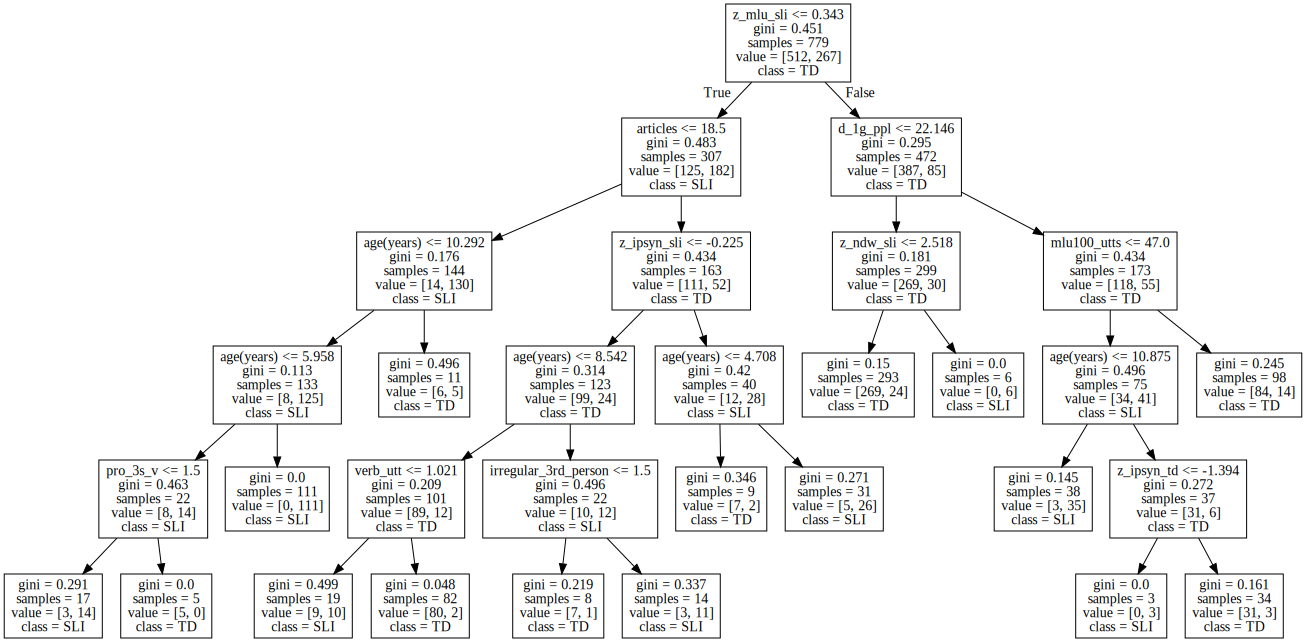

In [17]:
clfd = tree.DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clfd = clfd.fit(train_x,train_y)
Source(tree.export_graphviz(clfd, out_file=None,feature_names =list(df), class_names=["TD","SLI"]))

### Results Part 1
Of the features selected in the decision tree, only 3 features, (verb_utt, z_mlu_sli, and z_ipsyn_td) appear in either of the top 10 weighted features found with LR using L1/L2 Regularization. The most commonly used feature in the decision tree, 'age' (used in 5 nodes in the tree) did not appear in either LR feature list. 
The results of the decision tree show that the specified depth of the may be causing overfitting, as many of the leaves contain a very refinied distriction between each class. 

In [18]:
z_scaler = StandardScaler()
train_x_z = z_scaler.fit_transform(train_x)
test_x_z = z_scaler.fit_transform(test_x)

In [19]:
clf2_z = clf2.fit(train_x_z,train_y)

In [20]:
sort = [None]*10
for i, value in enumerate(np.argsort(abs(clf2.coef_[0]))):
    if (value <= 9):
        sort[value] = i

print("Top 10 Features w/ L2:")
n = 1
for i in sort:
    print(n, list(df)[i])
    n += 1

Top 10 Features w/ L2:
1 s_1g_ppl
2 z_mlu_sli
3 n_3s_v
4 child_TNW
5 uncontractible_copula
6 mlu_words
7 f_k
8 d_1g_ppl
9 z_mlu_td
10 d_2g_ppl


In [21]:
clf1_z = clf1.fit(train_x_z,train_y)

In [22]:
sort = [None]*10
for i, value in enumerate(np.argsort(abs(clf1.coef_)[0])):
    if value <= 9:
        sort[value] = i

print("Top 10 Features w/ L1:")
n = 1
for i in sort:
    print(n, list(df)[i])
    n += 1

Top 10 Features w/ L1:
1 z_ndw_sli
2 mlu100_utts
3 det_pl_n
4 retracing
5 regular_3rd_person_s
6 dss
7 pro_aux
8 n_dos
9 z_ipsyn_sli
10 z_utts_td


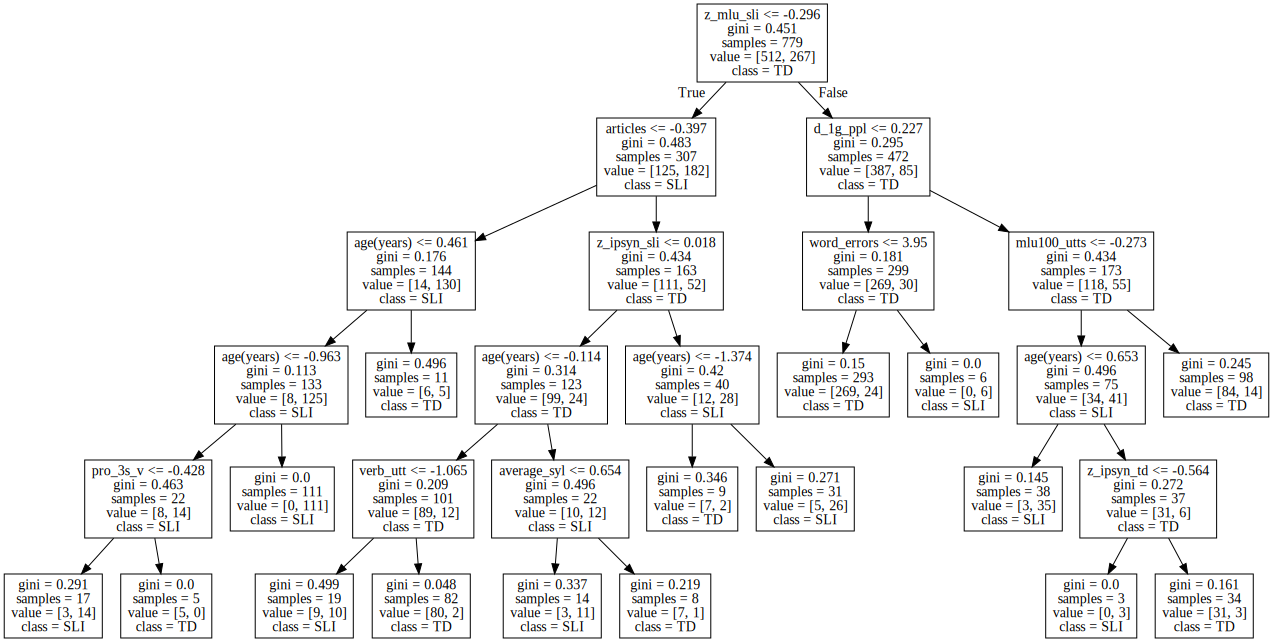

In [23]:
clfd_z = clfd.fit(train_x_z,train_y)
Source(tree.export_graphviz(clfd_z, out_file=None,feature_names =list(df), class_names=["TD","SLI"]))

### Results Part 2
With the standarization of the feature values, the top ten weighted features found with LR changed dramatically. This was contrasted by the effect the z-score had on the decision tree results where the classifier used almost all the same features as in Part 1. The same features appear in the top levels of the tree. Again, most of the decision tree features were not present in the top LR feature lists, and the most used feature by the decision tree, 'age', did not appear in the lists. 

Again, the results of the decision tree show that the specified depth of the may be causing overfitting, as many of the leaves contain a very refinied distriction between each class. 

In [24]:
mostPosNeg2 = clf2_z.predict_proba(test_x_z)

In [25]:
mostPos2 = 0
mostPosIndx2 = 0 
mostNeg2 = 0
mostNegIndx2 = 0
for i in range(len(mostPosNeg2)):
    if mostPosNeg2[i][1] > mostPos2:
        mostPos2 = mostPosNeg2[i][1]
        mostPosIndx2 = i        
    elif mostPosNeg2[i][0] > mostNeg2:
        mostNeg2 = mostPosNeg2[i][0]
        mostNegIndx2 = i 

print("The most positive object is ",mostPosIndx2)
print("The most negative object is ",mostNegIndx2)

The most positive object is  334
The most negative object is  345


## 1. The most positive object with respect to the probabilities.

In [26]:
totPosEvi_2p = 0
totNegEvi_2p = 0
p_evidence_1 = []
n_evidence_1 = []
for i, objFeatureValue in enumerate(test_x_z[mostPosIndx2]):
    evidenceComp = clf2_z.coef_[0][i]*objFeatureValue
    if evidenceComp >= 0:
        totPosEvi_2p += evidenceComp
        p_evidence_1.append((i,evidenceComp))
    else:
        totNegEvi_2p += evidenceComp
        n_evidence_1.append((i,evidenceComp))

In [27]:
print("The total positive evdence is ",totPosEvi_2p)
print("The total negative evidence is ",totNegEvi_2p)

The total positive evdence is  52.3018984531
The total negative evidence is  -6.0116872577


In [28]:
print("Probability distribution is", mostPosNeg2[mostPosIndx2])

Probability distribution is [ 0.  1.]


In [29]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(p_evidence_1)):
    if (p_evidence_1[i][1] > third and p_evidence_1[i][1] > second and p_evidence_1[i][1] > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = p_evidence_1[i][1]
        indx1 = p_evidence_1[i][0]
    elif (p_evidence_1[i][1] > third and p_evidence_1[i][1] > second):
        third = second 
        indx3 = indx2
        second = p_evidence_1[i][1]
        indx2 = p_evidence_1[i][0]
    elif(p_evidence_1[i][1] > third):
        third = p_evidence_1[i][1]
        indx3 = p_evidence_1[i][0]
        
print("First top feature for positive evidence:" ,list(df)[indx1])
print("Second top feature for positive evidence:" ,list(df)[indx2])
print("Third top feature for positive evidence:" ,list(df)[indx3])

First top feature for positive evidence: s_3g_ppl
Second top feature for positive evidence: s_2g_ppl
Third top feature for positive evidence: f_k


In [30]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(n_evidence_1)):
    if (abs(n_evidence_1[i][1]) > third and abs(n_evidence_1[i][1]) > second and abs(n_evidence_1[i][1]) > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = n_evidence_1[i][1]
        indx1 = n_evidence_1[i][0]
    elif (abs(n_evidence_1[i][1]) > third and abs(n_evidence_1[i][1]) > second):
        third = second 
        indx3 = indx2
        second = n_evidence_1[i][1]
        indx2 = n_evidence_1[i][0]
    elif(abs(n_evidence_1[i][1]) > third):
        third = n_evidence_1[i][1]
        indx3 = n_evidence_1[i][0]

print("First top feature for negative evidence:" ,list(df)[indx1])
print("Second top feature for negative evidence:" ,list(df)[indx2])
print("Third top feature for negative evidence:" ,list(df)[indx3])

First top feature for negative evidence: total_error
Second top feature for negative evidence: pro_3s_v
Third top feature for negative evidence: pro_aux


## 2. The most negative object with respect to the probabilities.

In [31]:
totPosEvi_2n = 0
totNegEvi_2n = 0
p_evidence_2 = []
n_evidence_2 = []

for i, objFeatureValue in enumerate(test_x_z[mostNegIndx2]):
    evidenceComp = clf2_z.coef_[0][i]*objFeatureValue
    if evidenceComp >= 0:
        totPosEvi_2n += evidenceComp
        p_evidence_2.append((i,evidenceComp))
    else:
        totNegEvi_2n += evidenceComp
        n_evidence_2.append((i,evidenceComp))

In [32]:
print("The total positive evdence is ",totPosEvi_2n)
print("The total negative evidence is ",totNegEvi_2n)

The total positive evdence is  6.44279537885
The total negative evidence is  -14.465906878


In [33]:
print("Probability distribution is", mostPosNeg2[mostNegIndx2])

Probability distribution is [  9.99672309e-01   3.27691073e-04]


In [34]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(p_evidence_2)):
    if (p_evidence_2[i][1] > third and p_evidence_2[i][1] > second and p_evidence_2[i][1] > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = p_evidence_2[i][1]
        indx1 = p_evidence_2[i][0]
    elif (p_evidence_2[i][1] > third and p_evidence_2[i][1] > second):
        third = second 
        indx3 = indx2
        second = p_evidence_2[i][1]
        indx2 = p_evidence_2[i][0]
    elif(p_evidence_2[i][1] > third):
        third = p_evidence_2[i][1]
        indx3 = p_evidence_2[i][0]
        
print("First top feature for positive evidence:" ,list(df)[indx1])
print("Second top feature for positive evidence:" ,list(df)[indx2])
print("Third top feature for positive evidence:" ,list(df)[indx3])

First top feature for positive evidence: regular_3rd_person_s
Second top feature for positive evidence: f_k
Third top feature for positive evidence: mlu100_utts


In [35]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(n_evidence_2)):
    if (abs(n_evidence_2[i][1]) > third and abs(n_evidence_2[i][1]) > second and abs(n_evidence_2[i][1]) > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = n_evidence_2[i][1]
        indx1 = n_evidence_2[i][0]
    elif (abs(n_evidence_2[i][1]) > third and abs(n_evidence_2[i][1]) > second):
        third = second 
        indx3 = indx2
        second = n_evidence_2[i][1]
        indx2 = n_evidence_2[i][0]
    elif(abs(n_evidence_2[i][1]) > third):
        third = n_evidence_2[i][1]
        indx3 = n_evidence_2[i][0]

print("First top feature for negative evidence:" ,list(df)[indx1])
print("Second top feature for negative evidence:" ,list(df)[indx2])
print("Third top feature for negative evidence:" ,list(df)[indx3])

First top feature for negative evidence: total_error
Second top feature for negative evidence: pro_aux
Third top feature for negative evidence: det_n_pl


# Finding most +/- evidence objects

In [36]:
p_evidence_tot = []
n_evidence_tot = []
p_evidence_val = 0
n_evidence_val = 0

index = 0
for obj in test_x_z:
    for i, objFeatureValue in enumerate(obj):
        evidenceComp = clf2_z.coef_[0][i]*objFeatureValue
        if evidenceComp >= 0:
            p_evidence_val += evidenceComp
        else:
            n_evidence_val += evidenceComp
    p_evidence_tot.append((obj,p_evidence_val,index))
    n_evidence_tot.append((obj,n_evidence_val,index))
    p_evidence_val = 0
    n_evidence_val = 0
    index += 1

In [37]:
most_pos_evidence = 0
most_pos_evidence_indx = 0
most_neg_evidence = 0
most_neg_evidence_indx = 0

for i in p_evidence_tot:
    if i[1] > most_pos_evidence:
        most_pos_evidence_indx = i[2]
        most_pos_evidence = i[1]


for i in n_evidence_tot:
    if i[1] < most_neg_evidence:
        most_neg_evidence_indx = i[2]
        most_neg_evidence = i[1]

print("Object with most positive log evidence is ",most_pos_evidence_indx)
print("Object with most negative log evidence is ",most_neg_evidence_indx)

Object with most positive log evidence is  334
Object with most negative log evidence is  324


## 3. The object that has the largest positive evidence.

In [38]:
eviPosEvi_2p = 0
eviNegEvi_2p = 0
p_evidence_3 = []
n_evidence_3 = []

for i, objFeatureValue in enumerate(test_x_z[most_pos_evidence_indx]):
    evidenceComp = clf2_z.coef_[0][i]*objFeatureValue
    if evidenceComp >= 0:
        eviPosEvi_2p += evidenceComp
        p_evidence_3.append((i,evidenceComp))
    else:
        eviNegEvi_2p += evidenceComp
        n_evidence_3.append((i,evidenceComp))

In [39]:
print("The total positive evdence is ",eviPosEvi_2p)
print("The total negative evidence is ", eviNegEvi_2p)

The total positive evdence is  52.3018984531
The total negative evidence is  -6.0116872577


In [40]:
print("Probability distribution is", mostPosNeg2[most_pos_evidence_indx])

Probability distribution is [ 0.  1.]


In [41]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(p_evidence_3)):
    if (p_evidence_3[i][1] > third and p_evidence_3[i][1] > second and p_evidence_3[i][1] > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = p_evidence_3[i][1]
        indx1 = p_evidence_3[i][0]
    elif (p_evidence_3[i][1] > third and p_evidence_3[i][1] > second):
        third = second 
        indx3 = indx2
        second = p_evidence_3[i][1]
        indx2 = p_evidence_3[i][0]
    elif(p_evidence_3[i][1] > third):
        third = p_evidence_3[i][1]
        indx3 = p_evidence_3[i][0]
        
print("First top feature for positive evidence:" ,list(df)[indx1])
print("Second top feature for positive evidence:" ,list(df)[indx2])
print("Third top feature for positive evidence:" ,list(df)[indx3])

First top feature for positive evidence: s_3g_ppl
Second top feature for positive evidence: s_2g_ppl
Third top feature for positive evidence: f_k


In [42]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(n_evidence_3)):
    if (abs(n_evidence_3[i][1]) > third and abs(n_evidence_3[i][1]) > second and abs(n_evidence_3[i][1]) > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = n_evidence_3[i][1]
        indx1 = n_evidence_3[i][0]
    elif (abs(n_evidence_3[i][1]) > third and abs(n_evidence_3[i][1]) > second):
        third = second 
        indx3 = indx2
        second = n_evidence_3[i][1]
        indx2 = n_evidence_3[i][0]
    elif(abs(n_evidence_3[i][1]) > third):
        third = n_evidence_3[i][1]
        indx3 = n_evidence_3[i][0]

print("First top feature for negative evidence:" ,list(df)[indx1])
print("Second top feature for negative evidence:" ,list(df)[indx2])
print("Third top feature for negative evidence:" ,list(df)[indx3])

First top feature for negative evidence: total_error
Second top feature for negative evidence: pro_3s_v
Third top feature for negative evidence: pro_aux


## The object that has the largest (in magnitude) negative evidence.

In [43]:
eviPosEvi_2n = 0
eviNegEvi_2n = 0
p_evidence_4 = []
n_evidence_4 = []

for i, objFeatureValue in enumerate(test_x_z[most_neg_evidence_indx]):
    evidenceComp = clf2_z.coef_[0][i]*objFeatureValue
    if evidenceComp >= 0:
        eviPosEvi_2n += evidenceComp
        p_evidence_4.append((i,evidenceComp))
    else:
        eviNegEvi_2n += evidenceComp
        n_evidence_4.append((i,evidenceComp))

In [44]:
print("The total positive evdence is ",eviPosEvi_2n)
print("The total negative evidence is ", eviNegEvi_2n)

The total positive evdence is  20.7628121949
The total negative evidence is  -22.4658669574


In [45]:
print("Probability distribution is", mostPosNeg2[most_neg_evidence_indx])

Probability distribution is [ 0.84593328  0.15406672]


In [46]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(p_evidence_4)):
    if (p_evidence_4[i][1] > third and p_evidence_4[i][1] > second and p_evidence_4[i][1] > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = p_evidence_4[i][1]
        indx1 = p_evidence_4[i][0]
    elif (p_evidence_4[i][1] > third and p_evidence_4[i][1] > second):
        third = second 
        indx3 = indx2
        second = p_evidence_4[i][1]
        indx2 = p_evidence_4[i][0]
    elif(p_evidence_4[i][1] > third):
        third = p_evidence_4[i][1]
        indx3 = p_evidence_4[i][0]
        
print("First top feature for positive evidence:" ,list(df)[indx1])
print("Second top feature for positive evidence:" ,list(df)[indx2])
print("Third top feature for positive evidence:" ,list(df)[indx3])

First top feature for positive evidence: child_TNW
Second top feature for positive evidence: total_syl
Third top feature for positive evidence: n_aux


In [47]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(n_evidence_4)):
    if (abs(n_evidence_4[i][1]) > third and abs(n_evidence_4[i][1]) > second and abs(n_evidence_4[i][1]) > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = n_evidence_4[i][1]
        indx1 = n_evidence_4[i][0]
    elif (abs(n_evidence_4[i][1]) > third and abs(n_evidence_4[i][1]) > second):
        third = second 
        indx3 = indx2
        second = n_evidence_4[i][1]
        indx2 = n_evidence_4[i][0]
    elif(abs(n_evidence_4[i][1]) > third):
        third = n_evidence_4[i][1]
        indx3 = n_evidence_4[i][0]

print("First top feature for negative evidence:" ,list(df)[indx1])
print("Second top feature for negative evidence:" ,list(df)[indx2])
print("Third top feature for negative evidence:" ,list(df)[indx3])

First top feature for negative evidence: total_error
Second top feature for negative evidence: pro_3s_v
Third top feature for negative evidence: pro_aux


## 5. The most uncertain object (the probabilities are closest to 0.5)

In [48]:
mostUncertain = 1
mostUncertainIndx = 0 
for i in range(len(mostPosNeg2)):
    if abs(mostPosNeg2[i][1] - mostPosNeg2[i][0]) < abs(mostUncertain):
        mostUncertain = mostPosNeg2[i][1] - mostPosNeg2[i][0]
        mostUncertainIndx = i        

print("The most uncertain object is ",mostUncertainIndx)

The most uncertain object is  333


In [50]:
unPosEvi_2 = 0
unNegEvi_2 = 0
p_evidence_5 = []
n_evidence_5 = []

for i, objFeatureValue in enumerate(test_x_z[mostUncertainIndx]):
    evidenceComp = clf2_z.coef_[0][i]*objFeatureValue
    if evidenceComp >= 0:
        unPosEvi_2 += evidenceComp
        p_evidence_5.append((i,evidenceComp))
    else:
        unNegEvi_2 += evidenceComp
        n_evidence_5.append((i,evidenceComp))

In [51]:
print("The total positive evdence is ",unPosEvi_2)
print("The total negative evidence is ",  unNegEvi_2)

The total positive evdence is  4.18792244862
The total negative evidence is  -3.98721163786


In [52]:
print("Probability distribution is", mostPosNeg2[mostUncertainIndx])

Probability distribution is [ 0.44999007  0.55000993]


In [53]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(p_evidence_5)):
    if (p_evidence_5[i][1] > third and p_evidence_5[i][1] > second and p_evidence_5[i][1] > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = p_evidence_5[i][1]
        indx1 = p_evidence_5[i][0]
    elif (p_evidence_5[i][1] > third and p_evidence_5[i][1] > second):
        third = second 
        indx3 = indx2
        second = p_evidence_5[i][1]
        indx2 = p_evidence_5[i][0]
    elif(p_evidence_5[i][1] > third):
        third = p_evidence_5[i][1]
        indx3 = p_evidence_5[i][0]
        
print("First top feature for positive evidence:" ,list(df)[indx1])
print("Second top feature for positive evidence:" ,list(df)[indx2])
print("Third top feature for positive evidence:" ,list(df)[indx3])

First top feature for positive evidence: mlu100_utts
Second top feature for positive evidence: examiner_TNW
Third top feature for positive evidence: z_ndw_td


In [54]:
indx1 = 0
indx2 = 0
indx3 = 0
first = 0
second = 0
third = 0

for i in range(len(n_evidence_5)):
    if (abs(n_evidence_5[i][1]) > third and abs(n_evidence_5[i][1]) > second and abs(n_evidence_5[i][1]) > first):
        third = second 
        indx3 = indx2
        second = first
        indx2 = indx1
        first = n_evidence_5[i][1]
        indx1 = n_evidence_5[i][0]
    elif (abs(n_evidence_5[i][1]) > third and abs(n_evidence_5[i][1]) > second):
        third = second 
        indx3 = indx2
        second = n_evidence_5[i][1]
        indx2 = n_evidence_5[i][0]
    elif(abs(n_evidence_5[i][1]) > third):
        third = n_evidence_5[i][1]
        indx3 = n_evidence_5[i][0]

print("First top feature for negative evidence:" ,list(df)[indx1])
print("Second top feature for negative evidence:" ,list(df)[indx2])
print("Third top feature for negative evidence:" ,list(df)[indx3])

First top feature for negative evidence: pro_aux
Second top feature for negative evidence: n_aux
Third top feature for negative evidence: n_v
